# Spotify Songs Dataset Exploratory Data Analysis Project

# Self Assesment


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
sns.set_style("darkgrid")

# Load Dataset

In [30]:
df = pd.read_csv("./datasets/spotify_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Data Cleaning

In [31]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [33]:
df.shape

(2017, 16)

In [34]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [35]:
len(df.columns)

16

In [36]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Data Analysis

Top 5 most popular artists

In [37]:
top_five_artists = df.groupby("artist").count().sort_values(by="song_title", ascending=False)["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

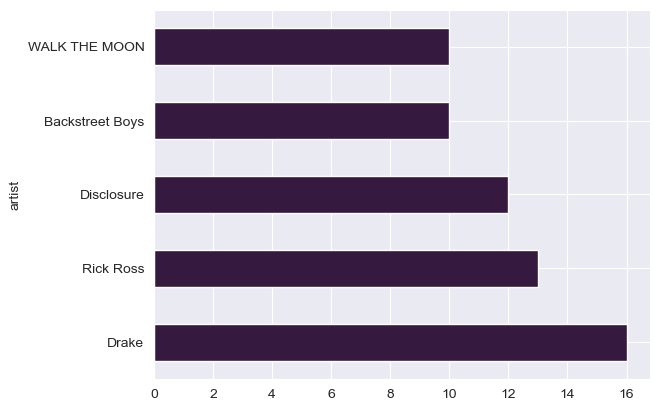

In [38]:
top_five_artists.plot.barh()
plt.show()

Top 5 Loudest tracks

In [39]:
top_five_loudest_tracks = df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


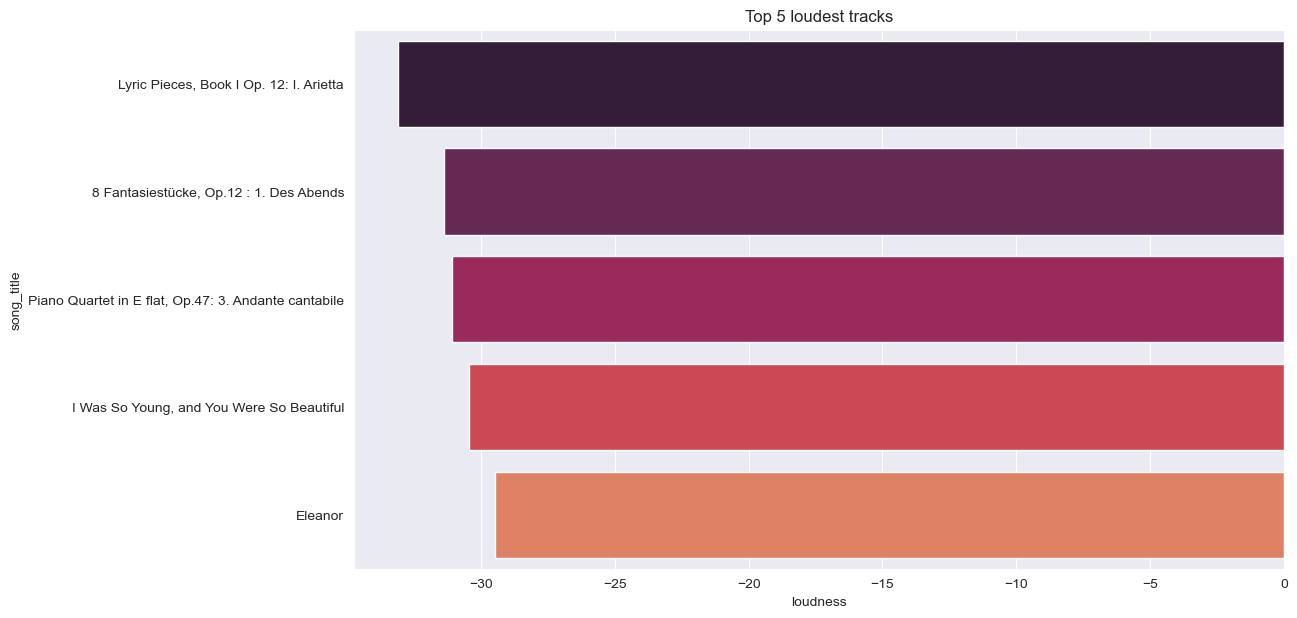

In [40]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

Artist with most danceability song

In [41]:
top_five_artists_danceable_songs = df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_five_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


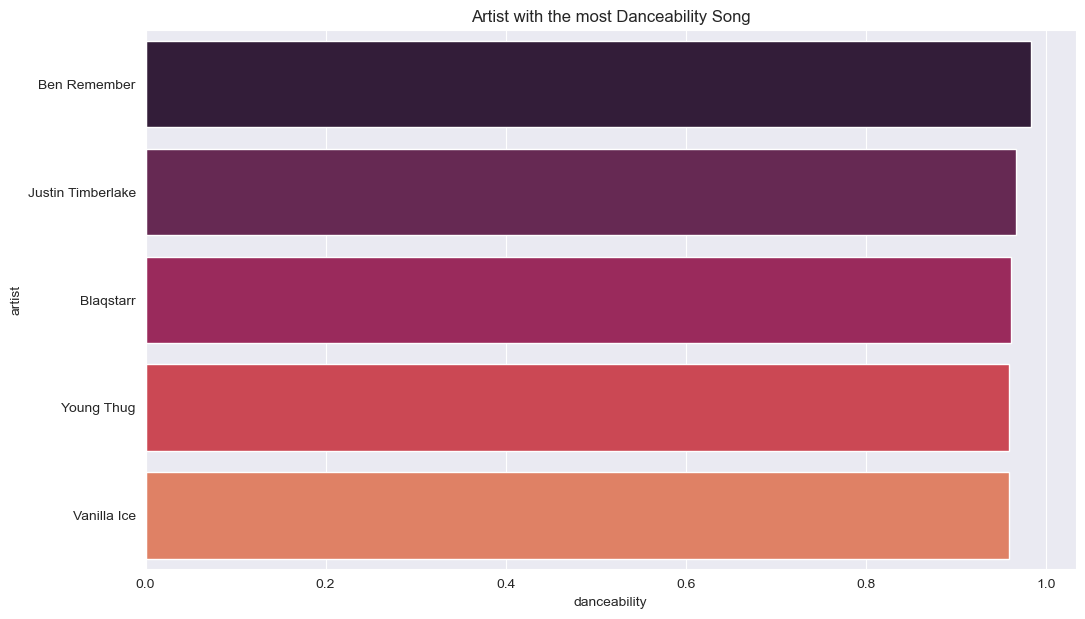

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability",y="artist",data=top_five_artists_danceable_songs)
plt.title("Artist with the most Danceability Song")
plt.show()

Top 10 instrumentalness tracks

In [43]:
top_ten_instrumental_tracks = df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


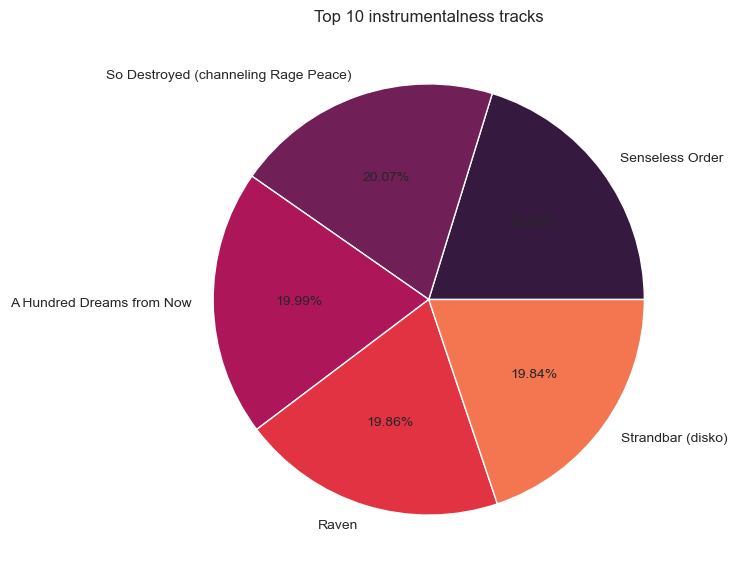

In [44]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness", data=top_ten_instrumental_tracks, autopct='%1.2f%%', labels=top_ten_instrumental_tracks.song_title)
plt.title("Top 10 instrumentalness tracks")
plt.show()

Multiple feature plots

In [45]:
interest_feature_cols = ["tempo","loudness","acousticness","danceability","duration_ms","energy","instrumentalness","liveness","speechiness","valence"]

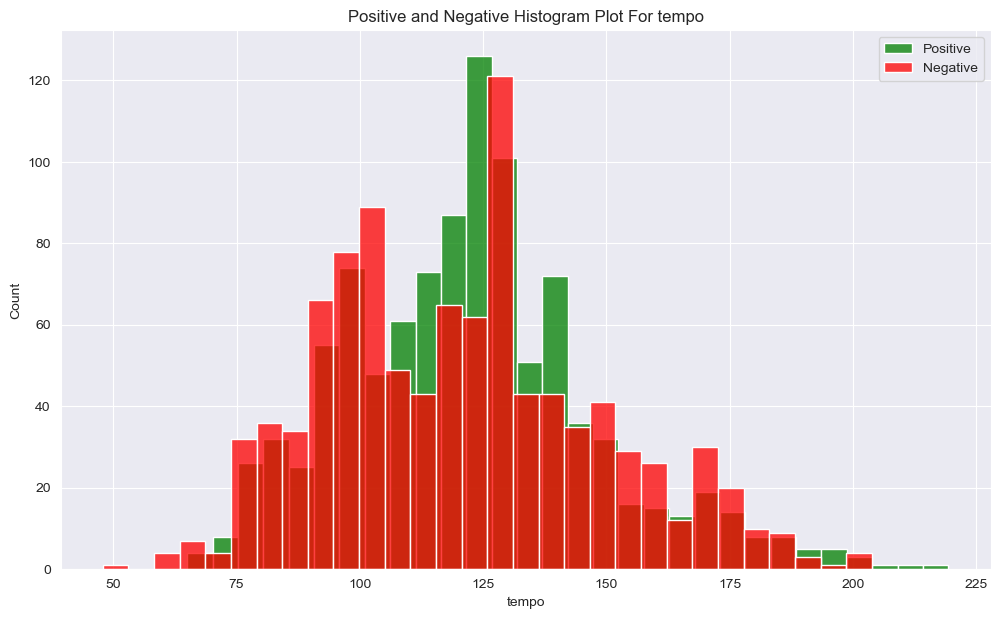

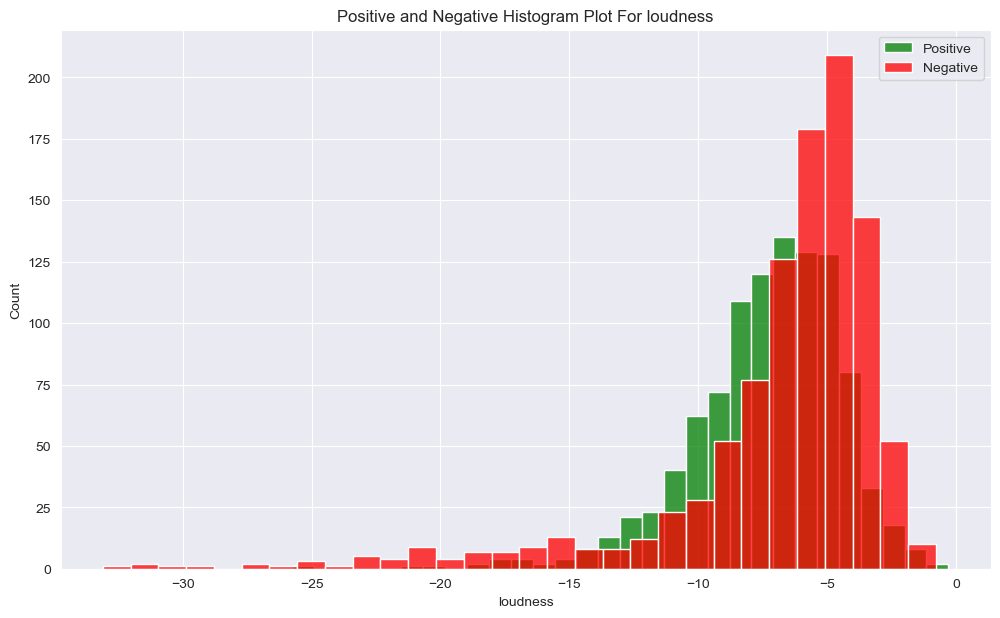

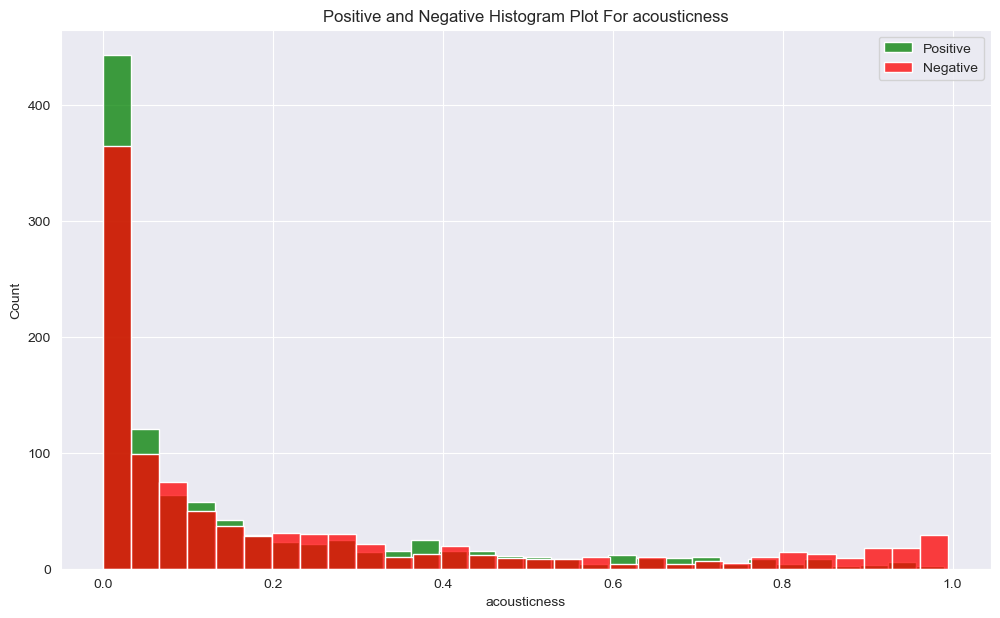

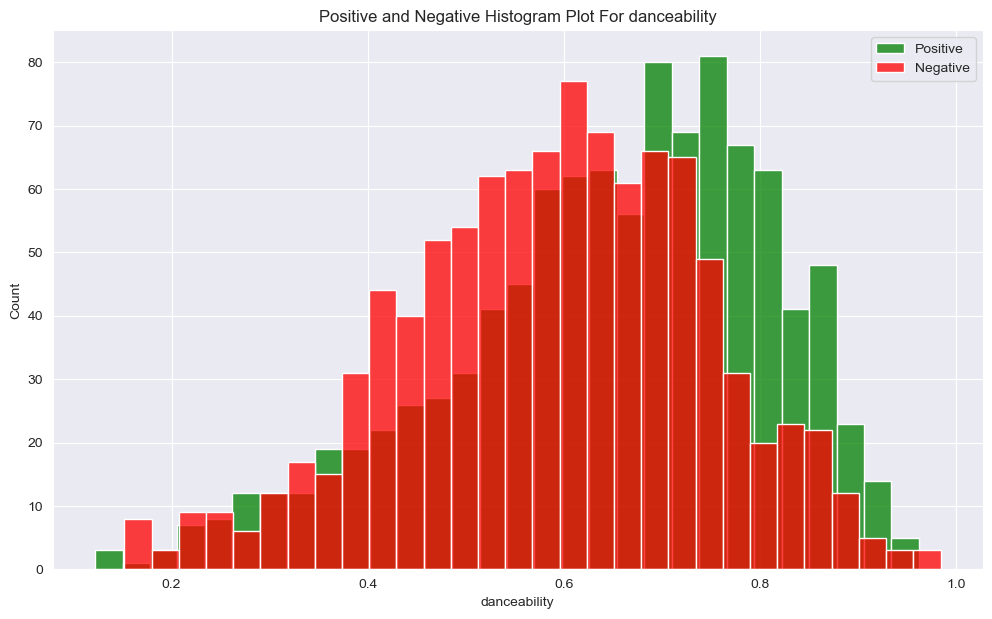

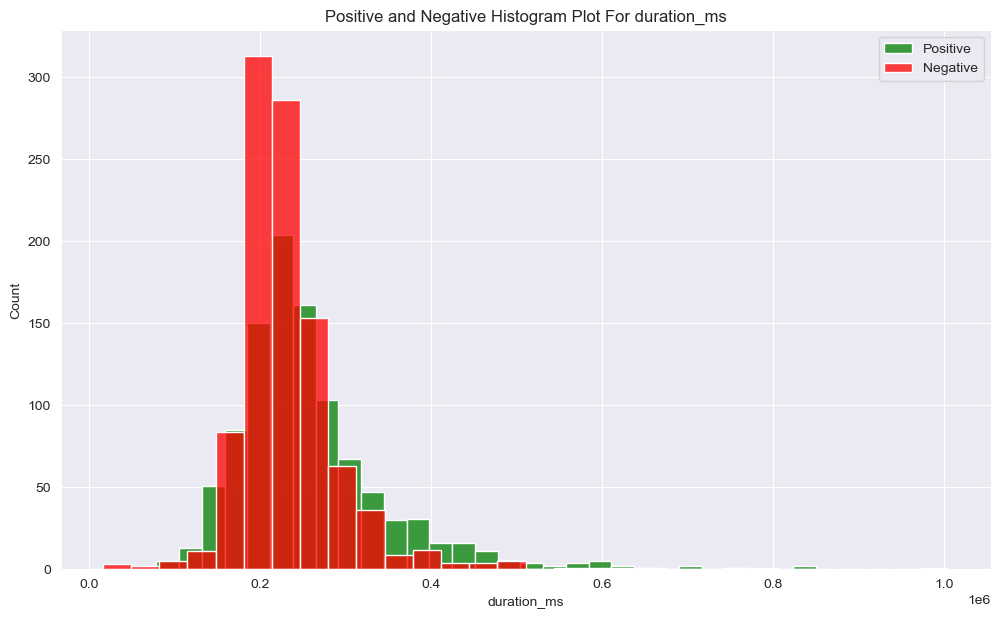

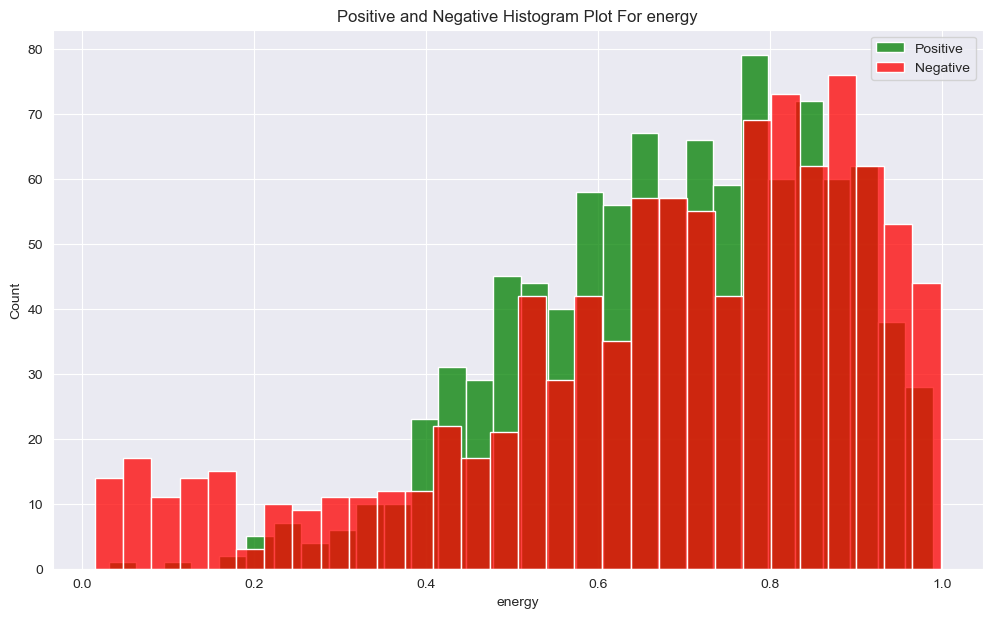

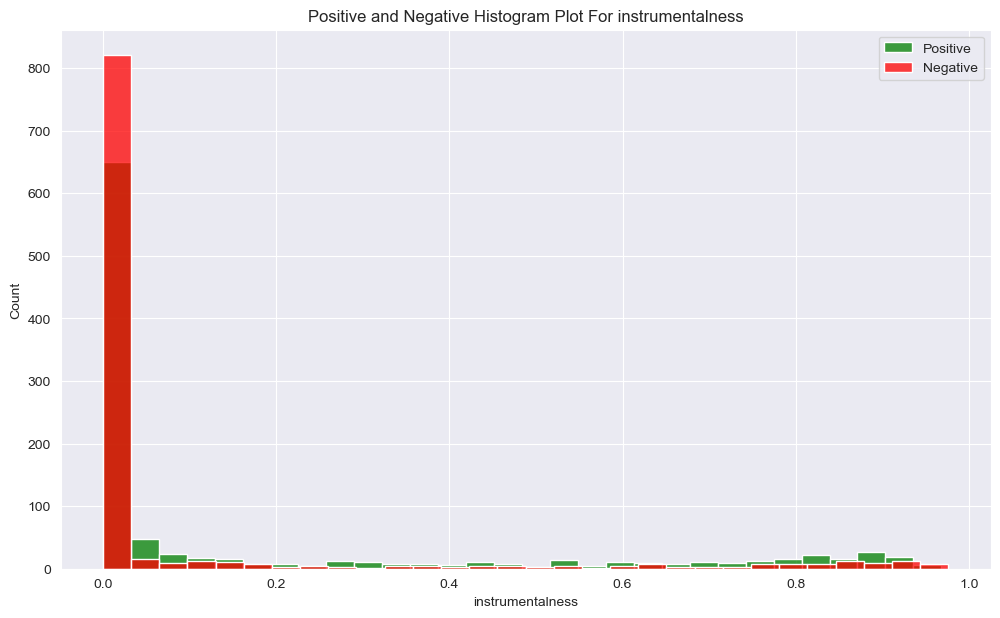

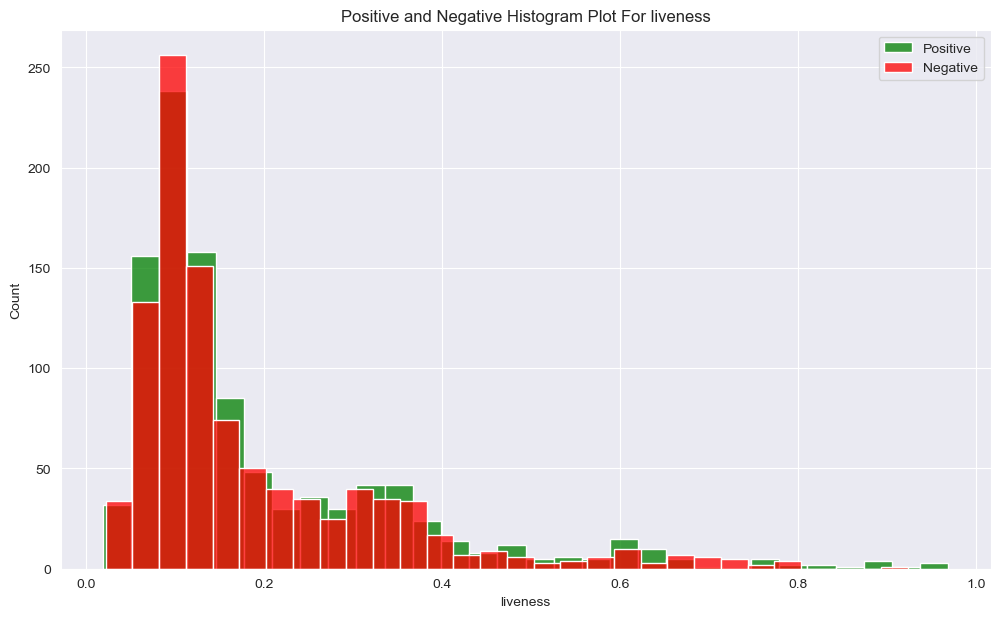

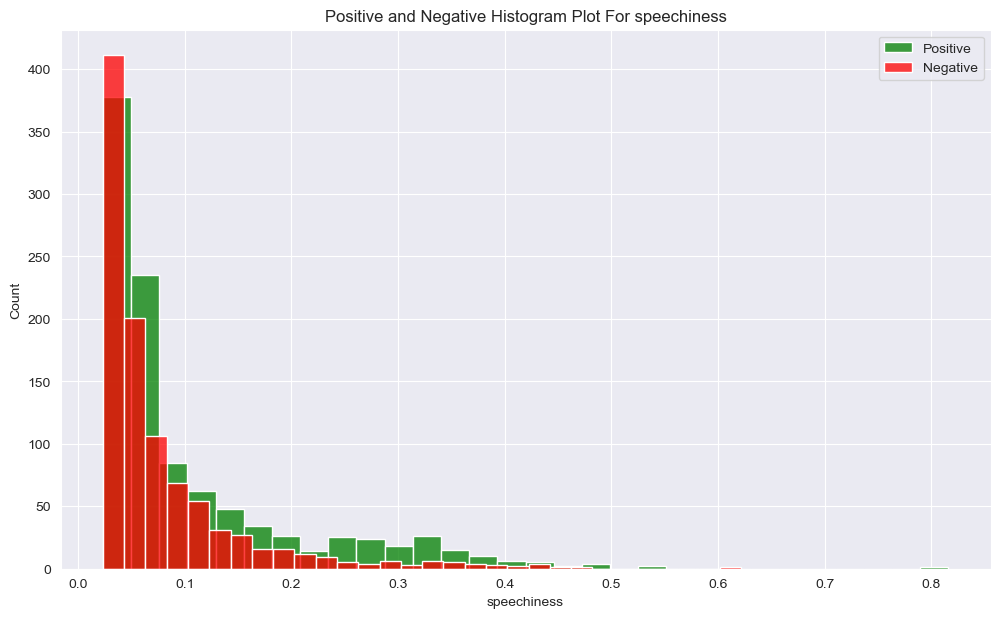

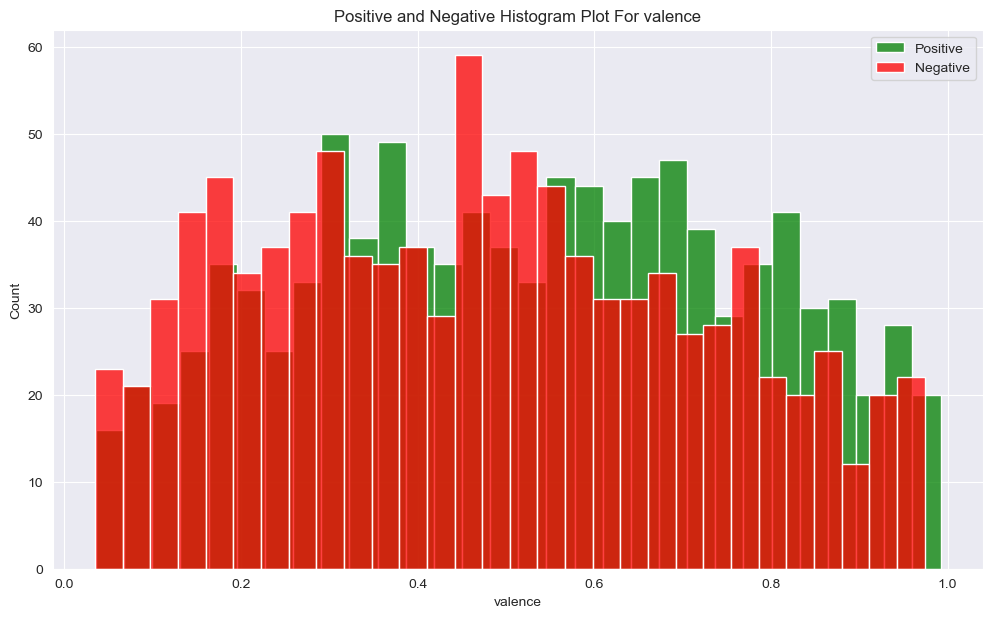

In [46]:
for feature_col in interest_feature_cols:
    pos_data = df[df["target"]==1][feature_col]
    neg_data = df[df["target"]==0][feature_col]
    
    plt.figure(figsize=(12,7))
    
    sns.histplot(pos_data, bins=30, label= "Positive", color="green")
    sns.histplot(neg_data, bins=30, label= "Negative", color="red")
    
    plt.legend(loc="upper right")
    plt.title(f"Positive and Negative Histogram Plot For {feature_col}")
    plt.show()

Top 10 energetic tracks

In [47]:
top_ten_energetic_tracks = df[["energy","song_title","artist"]].sort_values(by="energy",ascending=False)[:10]
top_ten_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


Text(0.5, 1.0, 'Top 10 Energetic songs')

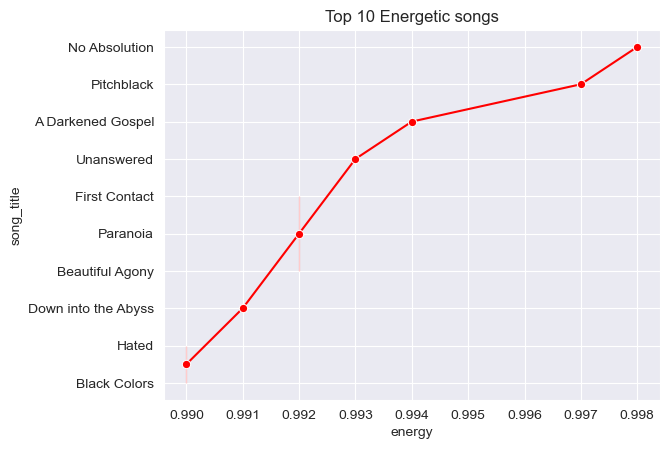

In [48]:
sns.lineplot(x ='energy', y ='song_title',data =  top_ten_energetic_tracks , marker ='o' ,color = 'r')
plt.title('Top 10 Energetic songs')

DURATION OF MOST OF THE SONGS

C:\Users\hp\AppData\Local\Temp\ipykernel_5368\3364343699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration_ms'] ,color ='m')


Text(0.5, 1.0, 'Average Duration of all Songs')

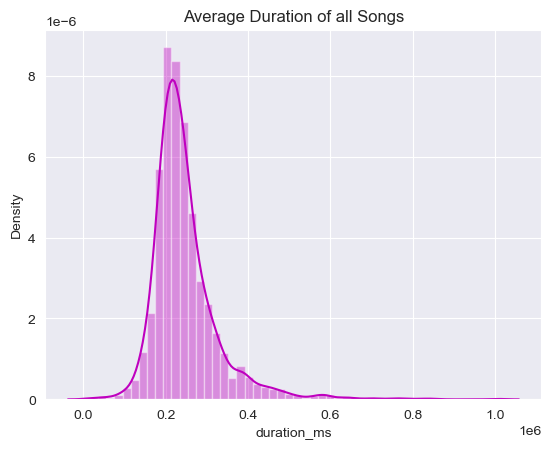

In [49]:
sns.distplot(df['duration_ms'] ,color ='m')
plt.title('Average Duration of all Songs')

DISTRIBUTION OF VARIOUS CONTINOUS AND DISCRETE FEATURES


In [50]:
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
    'liveness', 'loudness',  'tempo',  'valence', 'speechiness', 'instrumentalness']
discrete_cols = ['key','mode','time_signature','target']

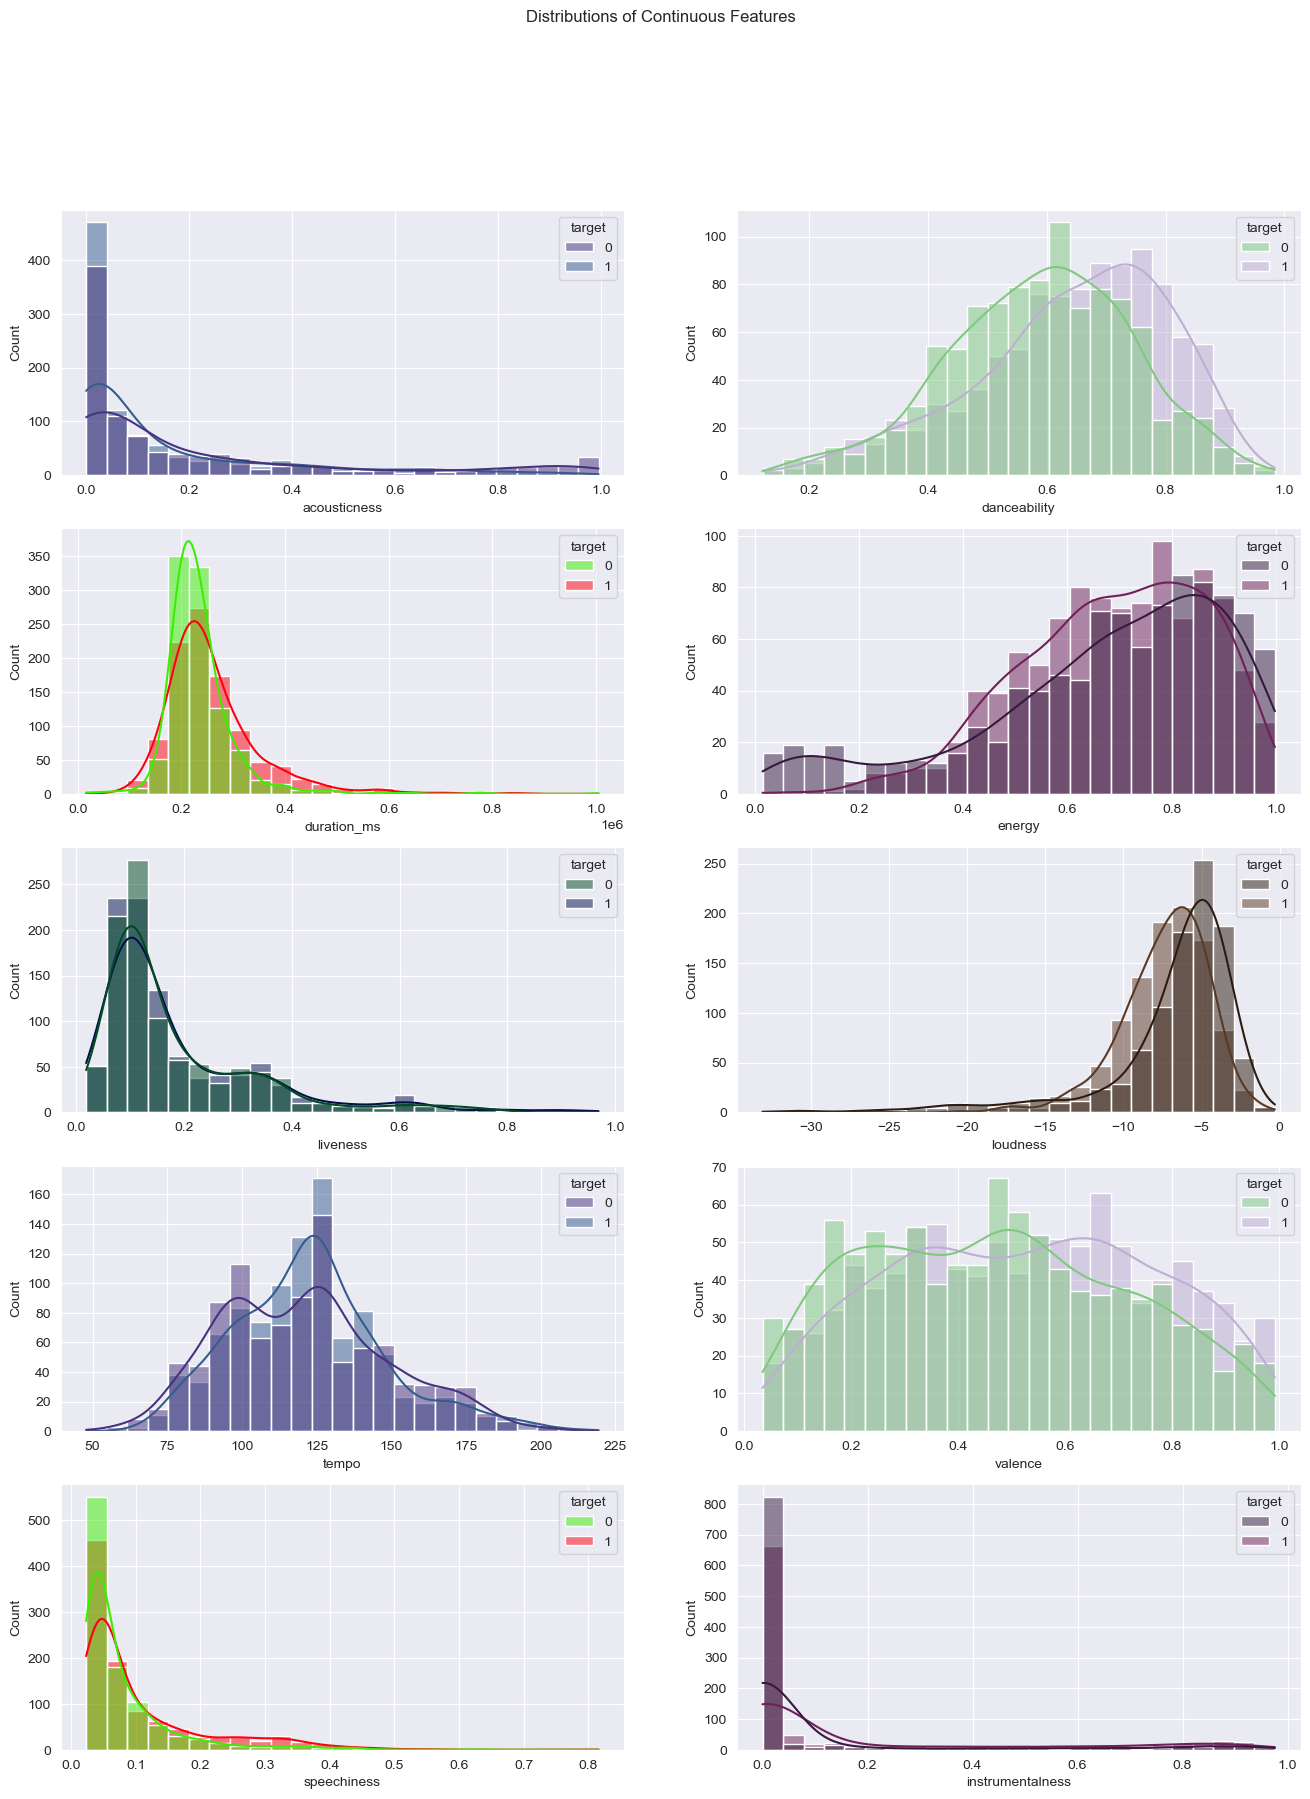

In [51]:
fig ,axes = plt.subplots(5,2 ,figsize =(16,20))
palettes =['viridis','Accent', 'prism', 'rocket' ,'ocean' ,'copper']

axes = axes.flatten()
ax_no =0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no%6])
    
    sns.histplot(data = df, x=col, hue='target', bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
fig.suptitle('Distributions of Continuous Features')
plt.show()

FEATURES CORRELATION ANALYSIS AND PLOT

C:\Users\hp\AppData\Local\Temp\ipykernel_5368\14153989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Positive - > HIGHLY CORRELATED
Negative - > LESS CORRELATED


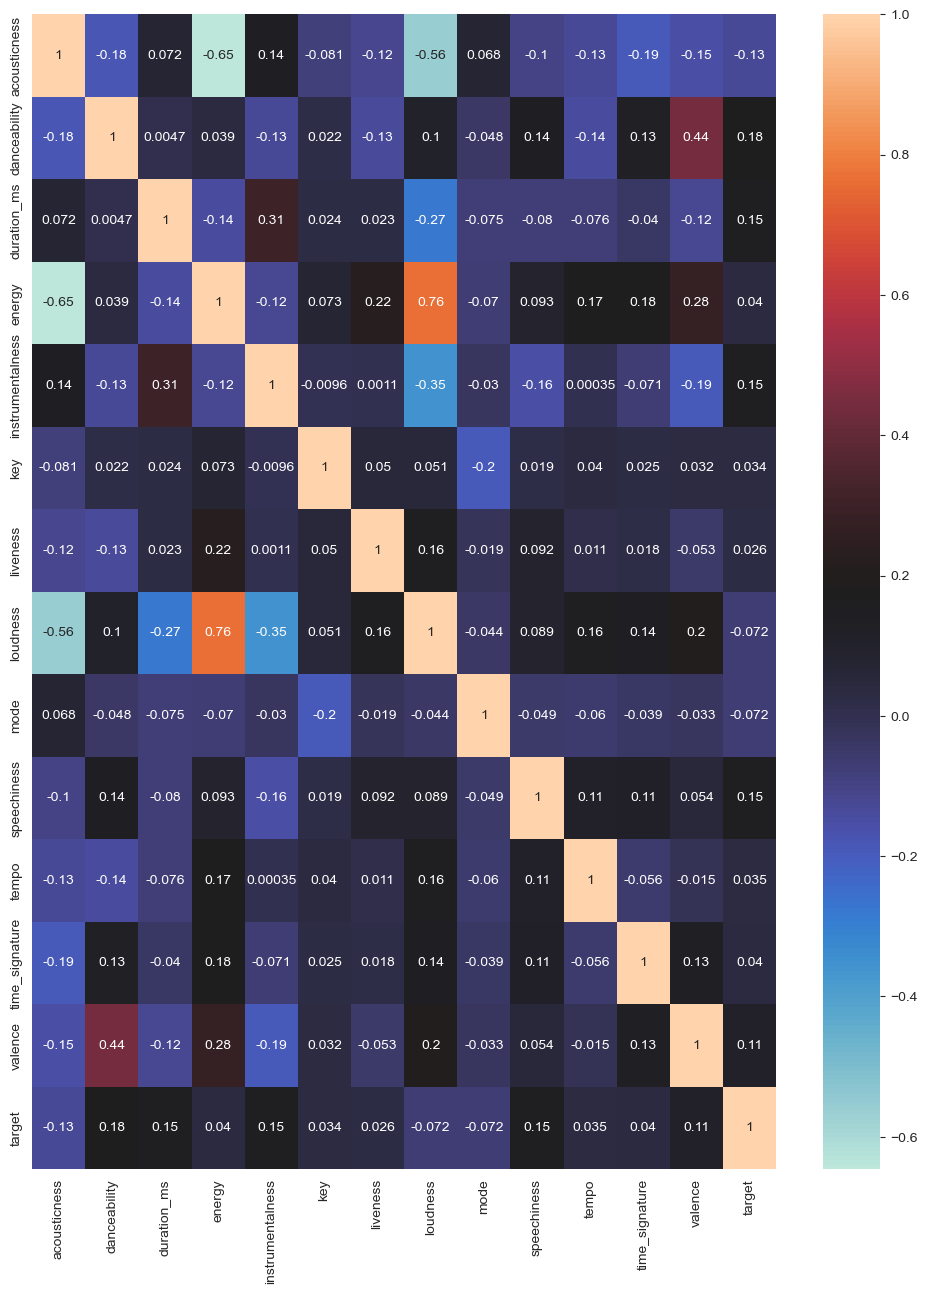

In [52]:
correlation = df.corr()
plt.figure(figsize =(12,15))
sns.heatmap(correlation ,cmap ='icefire' ,annot = True)
print('Positive - > HIGHLY CORRELATED')
print('Negative - > LESS CORRELATED')

SCATTER PLOT OF MOST CORRELATED AND NON CORRELATED FEATURES

<Axes: xlabel='danceability', ylabel='valence'>

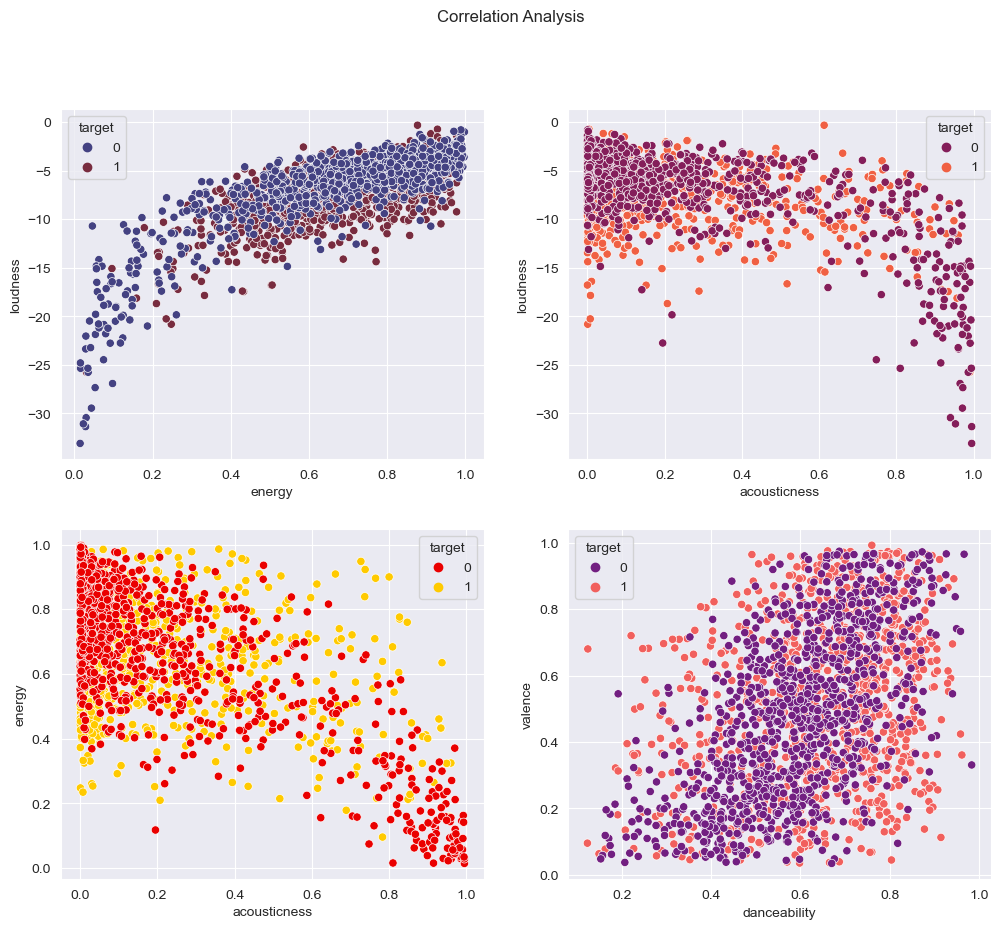

In [53]:
fig ,axes = plt.subplots(2,2 ,figsize =(12,10))
axes = axes.flatten()
fig.suptitle('Correlation Analysis')
sns.scatterplot(data = df , x = 'energy' ,y ='loudness' ,hue ='target' ,palette ='icefire' ,ax = axes[0])
sns.scatterplot(data = df , x = 'acousticness' ,y ='loudness' ,hue ='target' ,palette ="rocket" ,ax = axes[1])
sns.scatterplot(data = df , x = 'acousticness' ,y ='energy' ,hue ='target' ,palette ='hot' ,ax = axes[2])
sns.scatterplot(data = df , x = 'danceability' ,y ='valence' ,hue = 'target' ,palette ='magma' ,ax = axes[3])